# usa.gov 数据集

## 数据读入——处理json格式数据集

In [1]:
"""获取filename"""
path = 'D:/PythonWorkSpace/Python for Data Analysis/Python for Data Analysis Source Code/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

# 以txt格式读取文件
# 单行读取
##with open(path,'r') as fileobject:
##    print(fileobject.readline())
### 逐行读取
###    for line in fileobject:
###        print(line.rstrip()) 
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
"""以json格式读取文件"""
import json
# 列表推导式 -- 将单行数据储存分别作为元素存储到列表中，records现在保存一个字典列表（数据集格式本身即为每行属于一个对象字典），其操作同下
records = [json.loads(line) for line in open(path)]
# 列表头元素
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [3]:
# 列表头元素的字典的tz-时区key
records[0]['tz']

'America/New_York'

In [4]:
# 列表中所有含key-tz的字典的对应value组成列表time_zones
time_zones = [record['tz'] for record in records if 'tz' in record]
# 前十tz:value
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

## 采用 手写纯函数/调用python标准库函数/调用Pandas 分别来处理刚才获取的数据实现对 '时区key-value的遍历计数'

In [5]:
"""手写纯函数体处理"""
def get_counts(sequence):
    # 创建一个计数存储字典
    counts = {}
    # 遍历
    for x in sequence:
        if x in counts:
            #找到时，计数值+1
            counts[x] += 1
        else:
            # 找不到时，新建键值对
            counts[x] = 1
    return counts

# 调用计数函数
counts = get_counts(time_zones)
# 获取纽约地区的统计次数
counts['America/New_York']

1251

In [6]:
"""调用python标准库函数处理"""
from collections import defaultdict
def get_counts2(sequence):
    # 所有值均会被初始化为0，省去了上种方式中每个第一次匹配的键名都需新创建一个键值对的冗余步骤。
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

# 同上例
counts2 = get_counts2(time_zones)
counts['America/New_York']

1251

In [7]:
"""只获取前十位的时区及其计数值"""
def top10_counts(count_dict,n=10):
    # 列表推导式 -- 于count_dict中获取一个 key:value - tz:count，以(count,tz)存储在列表中 
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    # 对列表中二元组进行排序
    value_key_pairs.sort()
    # 返回排序过后的前十 [-n:] 时区二元组
    return value_key_pairs[-n:]

top10_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [8]:
"""调用python标准库函数来处理上述的 获取前十位的问题"""
from collections import Counter
# 将time_zones列表传入Counter中，新建其对象counts然后调用函数most_common()获取其中前十位置
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [9]:
"""调用Pandas + Numpy处理"""
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
# DataFrame是Pandas中最重要的数据结构，用于将数据表示为一个表格
# 此处即为将原始数据创建为一个表格
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [10]:
# 将表格表示为一个摘要视图 summary view，获取前十位元素字典的时区键值
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [11]:
# 通过 frame['tz'] 返回的 series对象所含的 value_counts()方法轻松实现上面的获取前十时区及其计数操作
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

## 运用绘图库Matplotlib为数据可视化

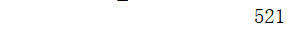

In [12]:
# 注意到在之前的排序中有许多的缺失值，比如下方计数为521的时区项 
from IPython.display import Image
Image(filename="ch2_1.png")

In [13]:
# 通过 通过 frame['tz'] 返回的 series对象所含的 pandas.DataFrame.fillna()方法，替换缺失值 NA
# 对于缺失值 -- 空字符串，可以通过 布尔型数组索引--'Missing' 加以替换
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Populating the interactive namespace from numpy and matplotlib


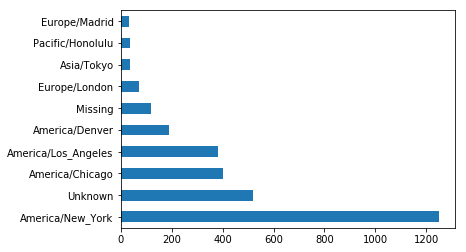

In [14]:
# 通过tz_counts对象(此时为一个字典对象)的plot()方法，绘制一张 水平条形图
# 进入pylab模式，其效果为自动在当前生命周期中集成matplotlib其效果与下句直接引入 matplotlib.pyplot()一致，具体作用看evernote
%pylab inline
# import matplotlib.pyplot as plot
tz_counts[:10].plot(kind='barh',rot=0)

In [15]:
# 调用a字段数据可查看，执行url短缩操作的
# 浏览器、设备、应用程序相关信息
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [16]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [17]:
frame['a'][2]

'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)'

## 解析数据得出信息

In [18]:
# 该a字段，即浏览器的USER_AGENT信息，我们接下来尝试解析这些信息
# Series 是一个一维数组对象，类似于 NumPy 的一维 array
# 它除了包含一组数据还包含一组索引，所以可以把它理解为一组带索引的数组

# 利用列表推导式将a字段中数据进行 split()切分，只获取x.split()返回的列表中的第一段[0]数据，即浏览器信息
# 随后调用pandas.DataFrame.dropna()除去 a字段列中含缺失值的行
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [19]:
# 以frame.a结构对比上方列表推导式所得结果
frame.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [20]:
# 获取Series对象results中各个字符串的出现次数，并只获取前8切片
# 从而获得按照浏览器分类的时区统计信息
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [21]:
# 接下来按照a字段中是否出现"windows"来判断用户的操作系统
# 从而将用户按照windows和非windows用户进行分类，来统计时区信息
# 将原始数据中所有a字段为空值的数据行舍弃，然后重新构造为一个frame-cframe,aka-cleanframe
cframe = frame[frame.a.notnull()]
# 处理后效果如下
cframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [22]:
# 通过np.where()对cframe中a字段进行分类,condition=cframe.a.str.contains('Windows') xfield='Windows' yfield='Not Windows'
# 并将结果保存为Series结构
operating_system = pd.Series(np.where(cframe.a.str.contains('Windows'),'Windows','Not Windows'),name='os')
operating_system[:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [23]:
# 通过pandas.groupby()对数据按照时区列表和新得的操作系统列表进行 分组
by_tz_os = cframe.groupby(['tz',operating_system])
# 通过size()对分组结果进行计数（类同于value_counts()函数效果,但因为value_counts()无法作用DataFrame对象，所以使用size()）
# 通过unstack()对计数结果进行重构（原结构模式如下cell）
# 最后通过fillna()将所有的空值替换为0
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,1.0,0.0
America/Anchorage,0.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [24]:
# 未使用unstack()重构结构的情况
agg_counts1 = by_tz_os.size()
agg_counts1[:10]

tz                   os         
                     Not Windows    180
                     Windows        316
Africa/Cairo         Not Windows      1
                     Windows          2
Africa/Casablanca    Windows          1
Africa/Ceuta         Not Windows      1
                     Windows          1
Africa/Johannesburg  Windows          1
Africa/Lusaka        Not Windows      1
America/Anchorage    Windows          4
dtype: int64

In [30]:
# 通过agg_counts中的行数构造一个间接索引数组来选取最常出现时区
# 通过sum()函数按照时区进行累加且规范化为'总计为1'，并以argsort()升序排列
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  21
Africa/Cairo                      51
Africa/Casablanca                 52
Africa/Ceuta                      36
Africa/Johannesburg               53
Africa/Lusaka                     34
America/Anchorage                 54
America/Argentina/Buenos_Aires    55
America/Argentina/Cordoba         56
America/Argentina/Mendoza         27
dtype: int64

In [31]:
# 通过take以该顺序截取最后10行
count_subset = agg_counts.take(indexer)[-10:]
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,12.0,21.0
Europe/Madrid,15.0,19.0
Pacific/Honolulu,10.0,25.0
Asia/Tokyo,14.0,23.0
Europe/London,32.0,40.0
America/Denver,56.0,125.0
America/Los_Angeles,122.0,247.0
America/Chicago,131.0,249.0
,180.0,316.0


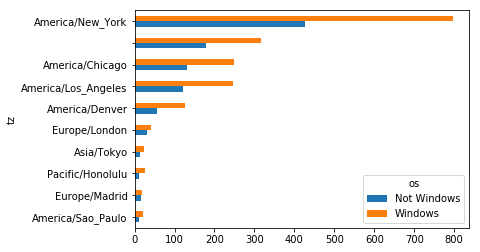

In [34]:
# 生成条形图
count_subset.plot(kind = 'barh')

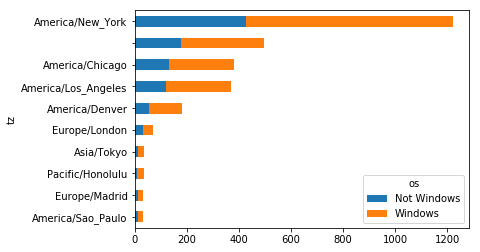

In [33]:
# 生成堆积条形图
count_subset.plot(kind = 'barh',stacked = True)

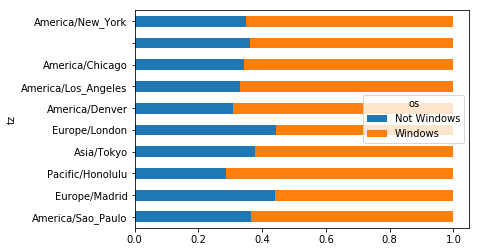

In [32]:
# 因为上两图中较小分组的相对比例看不太清楚，可以将各行 规范化为‘总计为1’，再重新绘图
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind = 'barh',stacked=True)